In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [17]:
df = pd.read_csv("heart.csv")
df.head()
df.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [18]:
df.shape

(1025, 14)

In [19]:
X = df.drop("target",axis=1)
y = df["target"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=50
)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)
print("LR Accuracy:", accuracy_score(y_test, pred_lr))


LR Accuracy: 0.824390243902439


In [23]:
svm = SVC()
svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))


SVM Accuracy: 0.8926829268292683


In [24]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, pred_rf))


RF Accuracy: 1.0


In [25]:
import pickle

pickle.dump(rf, open("model.pkl", "wb"))


In [28]:
import pickle
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       111

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



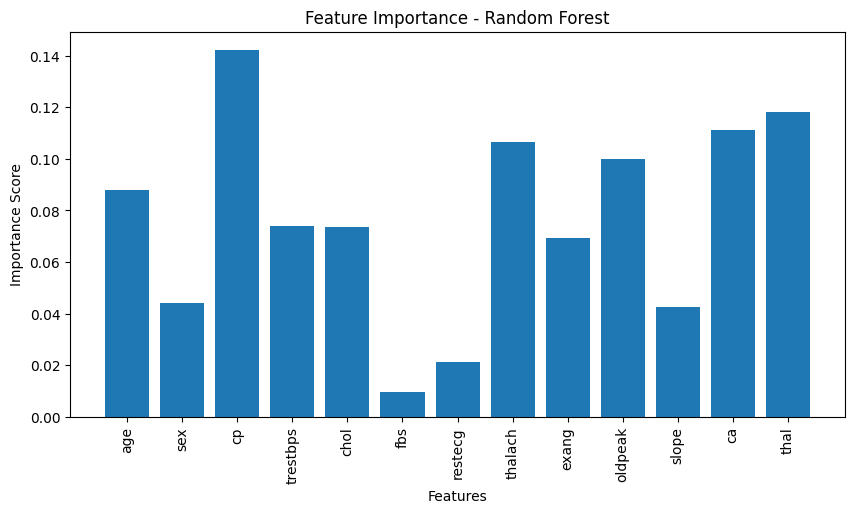

In [31]:
import matplotlib.pyplot as plt

# Get importance values
importance = rf.feature_importances_

# Feature names (same columns you used for training)
features = X.columns

# Plot
plt.figure(figsize=(10,5))
plt.bar(features, importance)

plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")

plt.xticks(rotation=90)
plt.show()
